In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget

tf.get_logger().setLevel('ERROR')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
y = df['label'].to_numpy()
X = df.iloc[:,1:].to_numpy()
print(f'x-shape: {X.shape}, y-shape: {y.shape}')

x-shape: (42000, 784), y-shape: (42000,)


### Examples of handwritten numbers. 

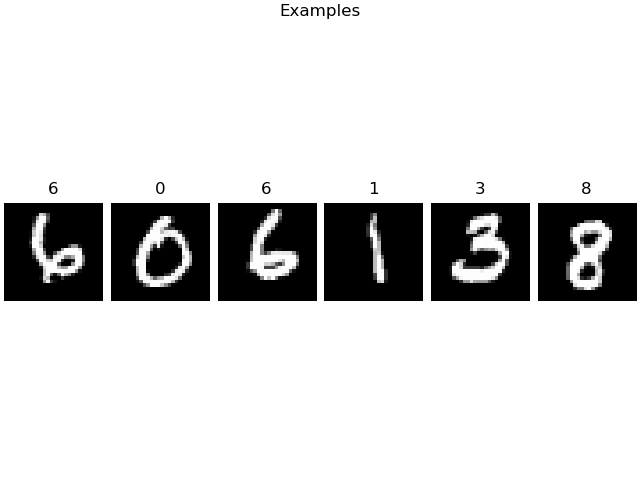

In [5]:
fig, ax = plt.subplots(1,6, constrained_layout=True)

for i in range(6):
    rando = np.random.randint(0,42000)
    ax[i].imshow(X[rando].reshape(28,28), cmap='gray')
    ax[i].set_axis_off()
    ax[i].set_title(y[rando])
    
fig.suptitle('Examples')

plt.show()

### Establish NN architecture. 

In [6]:
model = Sequential(
    [
        tf.keras.Input(shape=(784,)),
        Dense(units=25, activation='relu', name='L1'),
        Dense(units=15, activation='relu', name='L2'),
        Dense(units=10, activation='linear', name='L3')
        
    ]
)

2023-05-06 09:50:22.176895: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Parameters:

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                19625     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=.001,),
    metrics='accuracy'
)

history = model.fit(
    X,y,
    epochs=200
)

Epoch 1/50
1313/1313 [==============================] - 2s 1ms/step - loss: 2.4620 - accuracy: 0.2564
Epoch 2/50
1313/1313 [==============================] - 1s 1ms/step - loss: 1.6835 - accuracy: 0.3563
Epoch 3/50
1313/1313 [==============================] - 1s 1ms/step - loss: 1.3559 - accuracy: 0.4767
Epoch 4/50
1313/1313 [==============================] - 1s 1ms/step - loss: 1.1344 - accuracy: 0.5818
Epoch 5/50
1313/1313 [==============================] - 1s 984us/step - loss: 0.8661 - accuracy: 0.6803
Epoch 6/50
1313/1313 [==============================] - 1s 989us/step - loss: 0.7069 - accuracy: 0.7481
Epoch 7/50
1313/1313 [==============================] - 1s 1ms/step - loss: 0.5621 - accuracy: 0.8386
Epoch 8/50
1313/1313 [==============================] - 1s 1ms/step - loss: 0.4204 - accuracy: 0.8845
Epoch 9/50
1313/1313 [==============================] - 1s 1ms/step - loss: 0.3465 - accuracy: 0.9016
Epoch 10/50
1313/1313 [==============================] - 1s 1ms/step - loss: 0

### Weights and Biases Calculated from Back Prop

In [9]:
[layer1, layer2, layer3] = model.layers
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()

### Loss and Accuracy

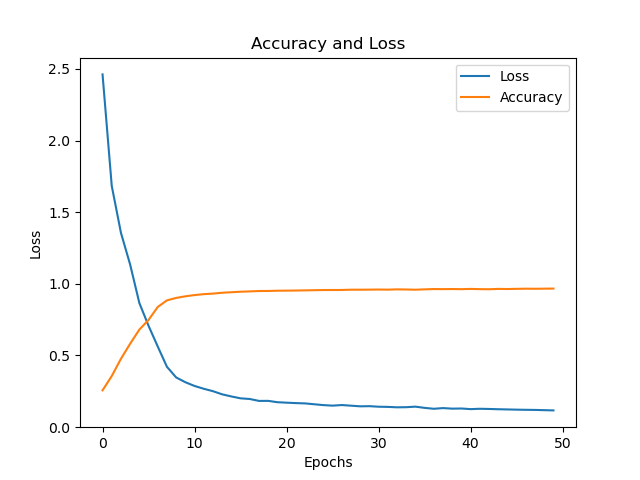

In [26]:
fig, ax = plt.subplots()

ax.plot(history.epoch, history.history['loss'], label='Loss')
ax.plot(history.epoch, history.history['accuracy'], label='Accuracy')

ax.set_title('Accuracy and Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()

plt.show()

# Prediction:

### Evaluate Model Performance

In [12]:
test_loss, test_acc = model.evaluate(x=X, y=y)
# Print out the model accuracy 
print('\nTest accuracy:', test_acc)

1313/1313 [==============================] - 1s 765us/step - loss: 0.1024 - accuracy: 0.9696

Test accuracy: 0.9695952534675598


### Examples of written numbers and the predicted values. 
Re-run cell to see examples of inputs, predictions, and actual values.

Actual Value: 5
1/1 [==============================] - 0s 22ms/step
Predicted Value: 5


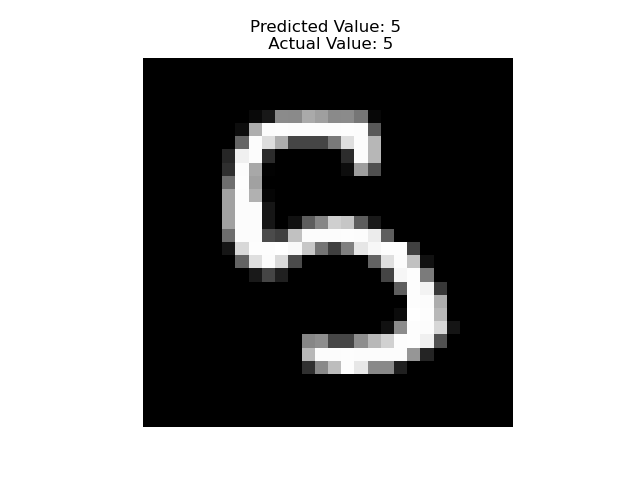

In [36]:
number = np.random.randint(0,42000)

print(f'Actual Value: {y[number]}')

prediction = model.predict(X[number].reshape(1,784))
print(f'Predicted Value: {np.argmax(prediction)}')

fig, ax = plt.subplots()

ax.imshow(X[number].reshape(28,28), cmap='gray')
ax.set_axis_off()
ax.set_title(f'Predicted Value: {np.argmax(prediction)} \n Actual Value: {y[number]}')

plt.show()

# Test
To be submitted to Kaggle competition for evaluation.

In [37]:
# import test dataset
df_test = pd.read_csv('test.csv')
X_test = df_test.to_numpy()

In [13]:
X_test.shape

(28000, 784)

In [14]:
prediction = model.predict(X_test)

875/875 [==============================] - 1s 682us/step


In [38]:
# convert Vectors/Numpy Arrays into DataFrame
final_predict = pd.DataFrame({'ImageID':np.arange(1, (X_test.shape[0] + 1)),
             'Label':np.argmax(prediction, axis=1)}).set_index('ImageID')

ValueError: All arrays must be of the same length

In [16]:
#final_predict.to_csv('/Users/jairusmartinez/Desktop/digit_prediction.csv', index=True)